#### algorithm based on human -> output
#### SIFT,HOG(human invaded)-> machine learning(SVM,KNN)->output
#### neural network(only)->output (deep learning = end-to-end machine learning)



In [1]:
#오차제곱합
import numpy as np


def sum_squares_error(y,t):
    return 0.5 *np.sum((y-t)**2)


In [3]:
t=[0,0,1,0,0,0,0,0,0,0]

y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))


y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))

0.5975

In [5]:
#교차 엔트로피 오차

def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [6]:
t=[0,0,1,0,0,0,0,0,0,0]

y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

cross_entropy_error(np.array(y),np.array(t))


0.510825457099338

In [7]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=\
load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        
    batch_size=y.shape[0]
    
    #for one-hot coding
    return -np.sum(t*np.log(y+1e-7))/batch_size
    
    #for label
    #return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size
    
    

ModuleNotFoundError: No module named 'dataset'

In [12]:
#2차함수
def function_1(x):
    return 0.01*x**2 + 0.1*x
#미분함수
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)


#편미분 함수
def function_2(x):
    return x[0]**2 +x[1]**2






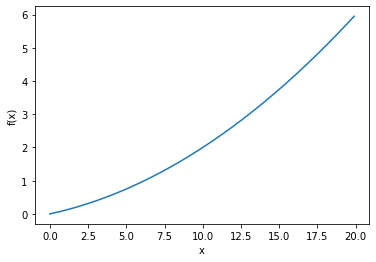

In [10]:
import matplotlib.pylab as plt

x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [13]:
numerical_diff(function_1,5)

0.1999999999990898

In [15]:
#x0=3, x1=4
def function_tmp1(x0):
    return x0*x0 + 4.0*2.0

def function_tmp2(x1):
    return 3.0**2.0+x1*x1



numerical_diff(function_tmp1,3.0)
numerical_diff(function_tmp2,4.0)




7.999999999999119

In [23]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)
    #x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val=x[idx]
        
        #f(x+h)계산
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        #f(x-h)계산
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val#값 복원
        
    return grad



# 손실 함수를 설정하는 이유?

정확도라는 지표를 두고 손실 함수를 정의하는 이유는, 정확도는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없게 되고, 손실 함수의 미분은 음 /양 방향으로 수정할 수 있도록 정의할 수 있기 때문이다!(정확도는 불연속값이 발생할 수 있고, 손실 함수는 그렇지 않다..)


# 경사법

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 함수 값을 점차 줄이는 것이 경사법이다.

## 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망 학습에서는 경사법을 많이 사용한다.




In [1]:
#f- 최적화 함수, init_x- 초깃값, lr- 학습률 , step_num - 갱신처리 횟수
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
        
    return x

        

# 신경망 학습에서도 기울기를 구해야한다. 

수식에서 하나의 원소가 의미하는 것은 w11을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 보여주는 것이다.






In [30]:
import sys,os
import numpy as np
sys.path.append(os.pardir)
import numpy as py
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
        #정규분포초기화
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        
        return loss


In [31]:
net =simpleNet()
print(net.W) #가중치 매개변수
x=np.array([0.6,0.9])
# p=net.predict(x)
# print(p)

#정답레이블

t=np.array([0,0,1])
net.loss(x,t)




[[0.47672163 1.05941932 0.98930138]
 [0.96472037 1.02020296 0.83584964]]


1.1173898844187278

In [32]:
def f(W):
    return net.loss(x,t)

dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.16206135  0.24165907 -0.40372042]
 [ 0.24309202  0.3624886  -0.60558062]]


결과를 볼때 [w11 w12 w13
          w21 w22 w23] 에서,
w11을 h만큼 늘리면 손실 함수의 값은 0.16h만큼 증가하는 의미고, 
w23에서는 h만큼 늘리면 손실 함수의 값은 0.6h만큼 감소한다는 의미이다.



# 학습 알고리즘 구현


#### 전체

신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다. 신경망 학습은 다음 4단계를 거친다.

#### 1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는게 목표

#### 2단계 - 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 적게 하는 방향을 제시

#### 3단계 - 매개변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

#### 4단계
    1~3단계를 반복한다
    
 


In [11]:
#2층 신경망 클래스 구현

import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    # the number of input layer neuron, the number of hidden layer neuron , the number of output layer neuron
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        
        self.params={}
        # params=>신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수)
        
        self.params['W1']=weight_init_std* \
                          np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std* \
                          np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
        
        
        #추론을 수행함
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        
        return y
    
    def loss(self,x,t):
        y=self.predict(x)
    
        return cross_entropy_error(y,t)
        #정확도를 구함
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(y,axis=1)
        
        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    
        #가중치 매개변수의 기울기를 구한다
    def numerical_gradient(self,x,t):
        loss_W=lambda W:self.loss(x,t)
        
        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])
        
        
        return grads
    
    
        
            
    
        


In [12]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

x=np.random.rand(100,784) #더미 입력 데이터(100장 분량)
t=np.random.rand(100,10)  #더미 정답 레이블(100장 분량)

#수치 미분 방식으로 매개변수의 기울기를 계산함

grads=net.numerical_gradient(x,t)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

#params 변수에는 이 신경망에 필요한 매개변수가 모두 저장됨을 보여준다


(784, 100)
(100,)
(100, 10)
(10,)


In [13]:
x=np.random.rand(100,784)
y=net.predict(x)

In [2]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test)=\
    load_mnist(normalisze=True,one_hot_label=True)

train_loss_list=[]

#hyperparameter

iters_num=10000  #반복 홧수

train_size=x_train.shape[0]
batch_size=100   #미니배치크기

learning_rate=0.1

network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    #기울기 계산
    grad=network.numerical_gradient(x_batch,t_batch)
    #grad=network.gradient(x_batch,t_batch)#성능개선판!!!
    
    #매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    #학습 경과 기록
    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    
#데이터를 반복해서 학습함으로 써 최적 가중치 매개변수로 서서히 다가서고 있다.




ModuleNotFoundError: No module named 'two_layer_net'

## Overfitting

너무 과도하게 데이터에 대해 모델을 learning을 한 경우를 의미한다. 현재에 대해 잘 설명하는 것 만으로 충분하지 않다. 우리가 사실 원하는 정보는 기존에 알고 있는 데이터에 대한 것이 아니라 새롭게 우리가 알게되는 데이터에 대한 것들을 알고 싶은 것인데, 정작 새로운 데이터에 대해서는 하나도 못맞추고, 제대로 설명할 수 없는 경우라면 쓸모가 없음.

오버피팅되었다는 것은, 예를 들어 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.

### epoch

에폭은 하나의 단위이다. 1 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예컨대 훈련 데이터 10000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법은 100회 반복하면 모든 훈련 데이터를 '소진'한 게 된다. 이 경우 100회가 1에폭이 된다.






In [3]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test)=\
    load_mnist(normalize=True,one_hot_label=True)

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

#hyper parameter
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

#1에폭당 반복수
iter_per_epoch=max(train_size/batch_size,1)

for i in range(iters_num):
    
    #미니배치 획득
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    #기울기 계산
    grad=network.numerical_gradient(x_batch,t_batch)
    #grad = network.gradient(x_batch,t_batch) #성능 개선판!
    
    #매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    #학습 경과 기록
    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc=network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "+ str(train_acc)+","+str(test_acc))
        
         


ModuleNotFoundError: No module named 'two_layer_net'